# Importer les librairies

In [3]:
using PyPlot: pygui
pygui(true)
using Plots
pyplot()

using SparseArrays
using LightGraphs
using SimpleWeightedGraphs

include("Parsers.jl")
include("Resolution.jl")
include("Resolution_clusters.jl")
include("plot.jl")


plot_bus_stops

# Importer les fichiers de données

In [4]:
file_directory = "/Users/gache/Documents/ENPC/2A/semestre_2/Projet_IMI/git/Data/Villages/"
client_file_name = joinpath(file_directory, "customer_requests.csv")
driver_file_name = joinpath(file_directory, "driver_shifts.csv")
map_file_name = joinpath(file_directory, "mTSP_matrix.csv")
gamma_file_name = joinpath(file_directory, "gammas.csv")
node_coordinates_file_name = joinpath(file_directory, "node_coordinates.csv")

"/Users/gache/Documents/ENPC/2A/semestre_2/Projet_IMI/git/Data/Villages/node_coordinates.csv"

# Parser les données, affichage des arrêts de bus

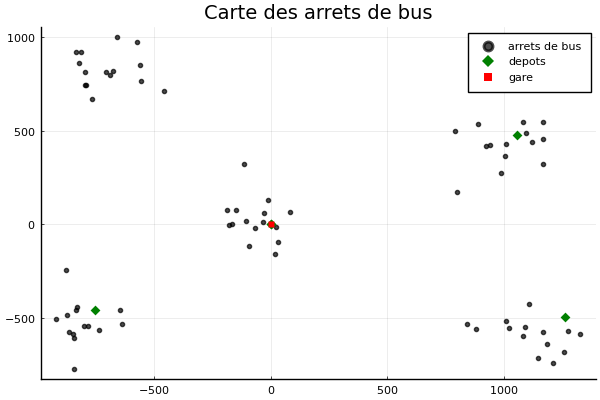

In [5]:
loc = build_localisations(node_coordinates_file_name)
depots, gare = build_drivers_and_gare(driver_file_name)
people = build_people_real_file_only_client(client_file_name, driver_file_name, map_file_name, gamma_file_name, false)
mappy,n = parser_real_file(map_file_name)
nb_buses = length(depots)
plot_bus_stops(loc, depots, gare)

# Construction des clusters avec hierarchical clustering

Person[Person(1, 21600.0, 28800.0), Person(30, 21600.0, 28800.0), Person(54, 21600.0, 28800.0), Person(38, 21600.0, 28800.0)]Person[Person(38, 21600.0, 28800.0), Person(30, 21600.0, 28800.0), Person(1, 21600.0, 28800.0), Person(54, 21600.0, 28800.0)]Person[Person(1, 21600.0, 28800.0), Person(54, 21600.0, 28800.0), Person(38, 21600.0, 28800.0), Person(30, 21600.0, 28800.0)]Person[Person(54, 21600.0, 28800.0), Person(1, 21600.0, 28800.0), Person(30, 21600.0, 28800.0), Person(38, 21600.0, 28800.0)]Person[Person(1, 21600.0, 28800.0), Person(54, 21600.0, 28800.0), Person(38, 21600.0, 28800.0), Person(30, 21600.0, 28800.0)]

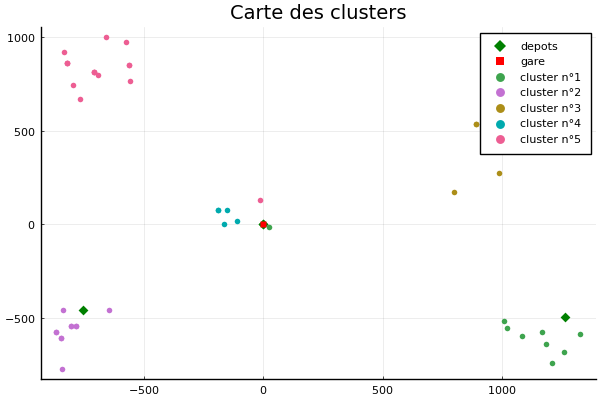

In [6]:
metric = angle_max
sol = hierarchical_clustering(people, mappy, gare, depots, 20, nb_buses, metric)
pl = plot_terminus(loc, depots, gare)
p_hierarchical_clustering = plot_clusters(sol, loc, pl, true)

# Construction des bus

In [ ]:
buses = compute_solution(sol)
println(buses)
total_time = get_total_time.(buses)
println(total_time)
println(sum(total_time))